In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pysentani as sti

In [31]:
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')

# pysentani access type function
survey['access_type'] = sti.access_type(survey)
survey = survey[['app_now/rice_cooker',
                 'app_now/TV',
                 'app_now/fridge',
                 'app_now/fan',
                 'app_now/lighting',
                 'app_now/radio',
                 'app_buy/rice_cooker',
                 'app_buy/TV',
                 'HP_y_n',
                 'app_buy/fridge',
                 'app_buy/fan',
                 'app_buy/lighting',
                 'app_buy/radio',
                 'access_type',]]
survey = survey.dropna()


In [32]:
# selecting only demand points that are households
# survey = survey[survey['demand_point'] == 'household']

In [33]:
# renaming columns
survey.rename(columns={'app_now/rice_cooker': 'Rice Cooker',
                       'app_now/TV': 'TV',
                       'app_now/fridge': 'Fridge',
                       'app_now/fan':'Fan',
                       'app_now/lighting': 'Lighting',
                       'app_now/radio': 'Radio',
                       'HP_y_n': 'Mobile Phone',
                       'access_type': 'Access Type'},
                                 inplace = True)


# renaming subcategories of Access Type
survey.replace(to_replace = {'Access Type': {'PLN_grid': 'PLN Grid',
                                             'community_microgrid': 'Community Microgrid',
                                             'PLN_microgrid': 'PLN Microgrid',
                                             'no_access': 'No Access'}},inplace = True)

In [34]:
# creating new dataframe that classifies each owned appliance by access type
subsurvey = survey[['Access Type',
                    'TV','Lighting','Mobile Phone','Radio',
                    'Rice Cooker','Fridge','Fan']]

In [35]:
# grouping new dataframe of appliances into specific access types
analyzed = subsurvey.groupby('Access Type').mean()
analyzed.transpose()

Access Type,Community Microgrid,No Access,PLN Grid,PLN Microgrid
TV,0.931818,0.807692,0.797590,0.808696
Lighting,0.909091,0.912088,0.927711,0.965217
Mobile Phone,0.840909,0.824176,0.715663,0.800000
Radio,0.522727,0.445055,0.303614,0.295652
Rice Cooker,0.136364,0.016484,0.272289,0.017391
Fridge,0.022727,0.010989,0.315663,0.026087
Fan,0.090909,0.098901,0.154217,0.026087


In [36]:
# creating variables for barplot graph
analyzed['Access Type'] = analyzed.index
melted = pd.melt(analyzed, 
                 id_vars=['Access Type'],
                 value_vars=['TV','Lighting','Mobile Phone','Radio',
                             'Rice Cooker','Fridge','Fan'],
                 value_name='Percent Ownership')

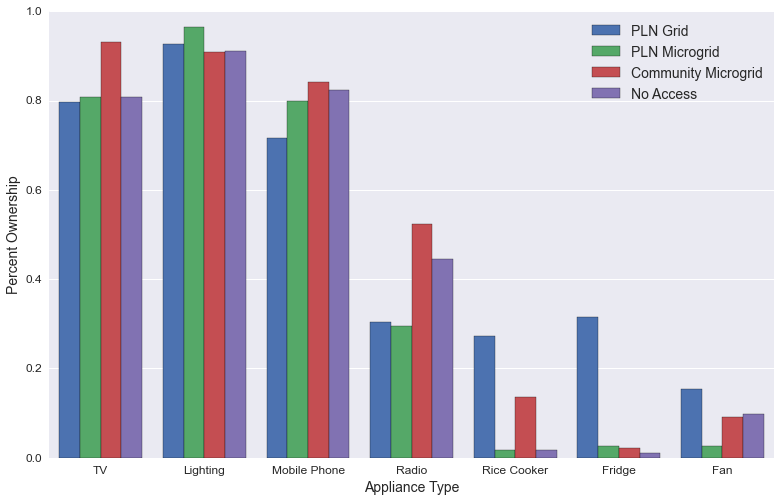

In [37]:
plt.figure(figsize=(13,8))
sns.barplot(x='variable', y='Percent Ownership', hue='Access Type',
            hue_order = ['PLN Grid','PLN Microgrid','Community Microgrid','No Access'],
            saturation=5, data=melted)
plt.legend(loc='upper right',prop={'size':14})
plt.xlabel('Appliance Type', fontsize=14)
plt.ylabel('Percent Ownership', fontsize=14)
plt.tick_params(labelsize=12)
plt.savefig('appliance-ownership-by-access-type.png')